# Linealización usando Numpy <br>
$\frac{dx}{dt} = -x^2 + \sqrt{u}$

In [1]:
# Solucion analitica con Python
import sympy as sp
sp.init_printing()
# definicion de simbolos
x,u = sp.symbols(['x','u'])
# definir ecuacion
dxdt = -x**2 + sp.sqrt(u)

print(sp.diff(dxdt,x))
print(sp.diff(dxdt,u))

-2*x
1/(2*sqrt(u))
Approximate Partial Derivatives
-4.000000000004
0.12499999999970868
Exact Partial Derivatives
-4.0
0.125


In [3]:
# Solucion numerica con Python
import numpy as np
from scipy.misc import derivative
u = 16.0
x = 2.0
def pd_x(x):
    dxdt = -x**2 + np.sqrt(u)
    return dxdt
def pd_u(u):
    dxdt = -x**2 + np.sqrt(u)
    return dxdt

print('Derivadas parciales aproximadas')
print(derivative(pd_x,x,dx=1e-4))
print(derivative(pd_u,u,dx=1e-4))

print('Derivadas parciales exactas')
print(-2.0*x) # exacta d(f(x,u))/dx
print(0.5 / np.sqrt(u)) # exacta d(f(x,u))/du

Derivadas parciales aproximadas
-4.000000000004
0.12499999999970868
Derivadas parciales exactas
-4.0
0.125


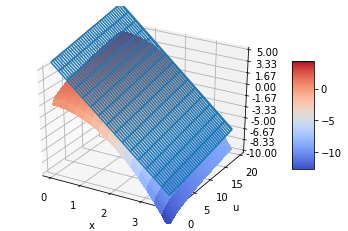

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

# Generar datos
X = np.arange(0, 4, 0.25)
U = np.arange(0, 20, 0.25)
X, U = np.meshgrid(X, U)
DXDT = -X**2 + np.sqrt(U)
LIN = -4.0 * (X-2.0) + 1.0/8.0 * (U-16.0)

# Graficar superficie
surf = ax.plot_wireframe(X, U, LIN)
surf = ax.plot_surface(X, U, DXDT, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Configurar eje z
ax.set_zlim(-10.0, 5.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Agregar barra de colores
fig.colorbar(surf, shrink=0.5, aspect=5)

# Agregar etiquetas
plt.xlabel('x')
plt.ylabel('u')

plt.show()

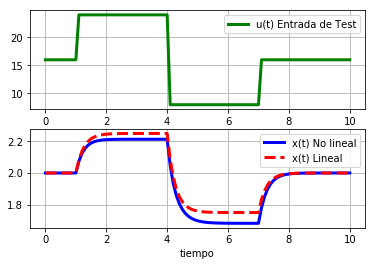

In [6]:
from scipy.integrate import odeint

# Funcion que retorna dz/dt
def model(z,t,u):
    x1 = z[0]
    x2 = z[1]
    dx1dt = -x1**2 + np.sqrt(u)
    dx2dt = -4.0*(x2-2.0) + (1.0/8.0)*(u-16.0)
    dzdt = [dx1dt,dx2dt]
    return dzdt

# condiciones de estado estable
x_ss = 2.0
u_ss = 16.0

# Condicion inicial
z0 = [x_ss,x_ss]

# Tiempo final
tf = 10

# Numero de puntos
n = tf * 10 + 1

# Tiempos
t = np.linspace(0,tf,n)

# Escalon unitario como entrada
u = np.ones(n) * u_ss
# Magnitud del escalon
m = 8.0
# Cambiar hasta m en el tiempo 1.0
u[11:] = u[11:] + m
# Cambiar hasta 2*m en el tiempo 4.0
u[41:] = u[41:] - 2.0 * m
# Cambiar hasta m en el tiempo 7.0
u[71:] = u[71:] + m

# Almacenar solucion
x1 = np.empty_like(t)
x2 = np.empty_like(t)
# condiciones iniciales
x1[0] = z0[0]
x2[0] = z0[1]

# solucionar ODE
for i in range(1,n):
    # expasion para el siguiente instante de tiempo
    tspan = [t[i-1],t[i]]
    # Soluciones para el siguiente paso
    z = odeint(model,z0,tspan,args=(u[i],))
    # Almacenar solcuion para graficarla
    x1[i] = z[1][0]
    x2[i] = z[1][1]
    # Siguiente condicion inicial
    z0 = z[1]

# Graficar resultados
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t,u,'g-',linewidth=3,label='u(t) Entrada de Test')
plt.grid()
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,x1,'b-',linewidth=3,label='x(t) No lineal')
plt.plot(t,x2,'r--',linewidth=3,label='x(t) Lineal')
plt.xlabel('tiempo')
plt.grid()
plt.legend(loc='best')
plt.show()